In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (6,15)

In [2]:
numberOfSamples = 7*10-7

with open("../data/input.dat", "r") as arq:
    A = np.loadtxt(arq, delimiter=",")

print(A)

[[ 6.  0. 46.]
 [ 5.  0. 54.]
 [ 4.  0. 59.]
 [ 2.  0. 78.]
 [ 0.  0. 73.]
 [ 6.  1. 61.]
 [ 5.  1. 65.]
 [ 4.  1. 79.]
 [ 3.  1. 66.]
 [ 2.  1. 79.]
 [ 1.  1. 69.]
 [ 0.  1. 71.]
 [ 6.  2. 71.]
 [ 4.  2. 88.]
 [ 3.  2. 74.]
 [ 2.  2. 73.]
 [ 1.  2. 60.]
 [ 0.  2. 49.]
 [ 6.  3. 78.]
 [ 5.  3. 86.]
 [ 4.  3. 82.]
 [ 3.  3. 75.]
 [ 2.  3. 70.]
 [ 0.  3. 56.]
 [ 6.  4. 88.]
 [ 5.  4. 69.]
 [ 4.  4. 73.]
 [ 3.  4. 69.]
 [ 2.  4. 63.]
 [ 1.  4. 49.]
 [ 0.  4. 53.]
 [ 6.  5. 86.]
 [ 5.  5. 57.]
 [ 4.  5. 67.]
 [ 3.  5. 63.]
 [ 2.  5. 61.]
 [ 1.  5. 53.]
 [ 0.  5. 59.]
 [ 6.  6. 67.]
 [ 5.  6. 71.]
 [ 3.  6. 56.]
 [ 2.  6. 55.]
 [ 1.  6. 61.]
 [ 0.  6. 65.]
 [ 6.  7. 48.]
 [ 5.  7. 44.]
 [ 4.  7. 57.]
 [ 2.  7. 64.]
 [ 1.  7. 43.]
 [ 0.  7. 74.]
 [ 5.  8. 62.]
 [ 4.  8. 72.]
 [ 3.  8. 75.]
 [ 2.  8. 74.]
 [ 1.  8. 70.]
 [ 0.  8. 59.]
 [ 6.  9. 64.]
 [ 5.  9. 75.]
 [ 4.  9. 87.]
 [ 3.  9. 91.]
 [ 2.  9. 85.]
 [ 1.  9. 79.]
 [ 0.  9. 77.]]


In [3]:
def plotMat(A):
    fig, ax = plt.subplots()
    ax.scatter(A[:,1], A[:,0])
    plt.show()

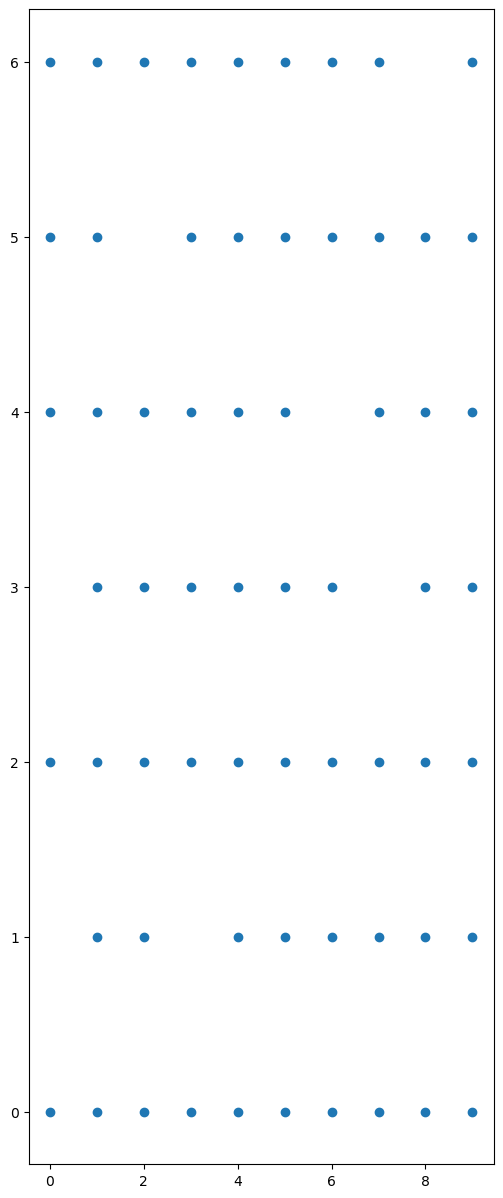

In [4]:
plotMat(A)

In [5]:
def parallelLines(x_pos, y_pos, x, h, theta):
    bound1 = (x - x_pos + h/np.cos(theta))*np.tan(theta) + y_pos
    bound2 = (x - x_pos - h/np.cos(theta))*np.tan(theta) + y_pos
    return bound2, bound1

def test_parallelLines():
    x = 1
    h = 0.5
    theta = 45 * np.pi / 180
    x_pos = 0
    y_pos = 0
    lowerBound, upperBound = parallelLines(x_pos, y_pos, x, h, theta)
    assert lowerBound < upperBound
    assert upperBound < 2
    assert lowerBound > 0
    
    print(lowerBound, upperBound)
    
    x = 1
    h = 0.5
    theta = -45 * np.pi / 180
    x_pos = 0
    y_pos = 0
    upperBound, lowerBound = parallelLines(x_pos, y_pos, x, h, theta)
    
    print(lowerBound, upperBound)
    assert lowerBound < upperBound
    assert upperBound < 0
    assert lowerBound > -2
    
test_parallelLines()

0.2928932188134525 1.7071067811865472
-1.7071067811865472 -0.2928932188134525


In [6]:
def getSamplesInDirection(A, x_pos, y_pos, direction, tolerance=0.5):
    B = []
    theta = direction * np.pi /180
    if direction%90 != 0:
        for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
            bounds = parallelLines(x_pos, y_pos, x, tolerance, theta)
            if y > min(bounds) and y < max(bounds) and np.sign(np.cos(theta))*(x - x_pos)>0:
                B.append(list(A[i, :]))
    elif abs(np.cos(theta)) < 1e-15:
        for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
            if np.sign(np.cos(theta))*(y-y_pos)>0 and abs(x-x_pos)<tolerance:
                B.append(list(A[i, :]))
    else:
        for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
            if np.sign(np.cos(theta))*(x-x_pos)>0 and abs(y-y_pos)<tolerance:
                B.append(list(A[i, :]))

    
        
            
    return np.array(B)
     
def test_getSamplesInDirection():
    B = getSamplesInDirection(A, 0, 0, 45)
    
    np.all(B[:,2] - np.array([69, 73, 75, 73, 57, 67]))

    print(B[:,2])
    
    B = getSamplesInDirection(A, 0, 0, 90)
    
    np.all(B[:,2] - np.array([46, 54, 56, 78]))

    print(B[:,2])
    
test_getSamplesInDirection()

[69. 73. 75. 73. 57. 67.]
[46. 54. 59. 78.]


In [7]:
def getSamplesInsideLag(A, x_pos, y_pos, lag, tolerance=0.5):
    upperBound = (lag + tolerance)**2
    lowerBound = (lag - tolerance)**2
    B = []
    for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
        value = (x-x_pos)**2 + (y-y_pos)**2
        if value <= upperBound and value >= lowerBound:
            B.append(list(A[i, :]))
            
    return np.array(B)

def test_getSamplesInsideLag():
    B = getSamplesInsideLag(A, 0, 0, np.sqrt(2), 0.5)
    
    np.all(B[:,2] - np.array([69, 71]))
    print(B[:,2])
    
test_getSamplesInsideLag()

[69. 71.]


In [8]:
def getPairsOfPointsInDirection(A,direction, lag, maxLags=4):
    """
    Function to get the various pairs of points for each lag in a specific direction
    
    Arguments:
        - A: 2D numpy array
        - direction: a angle, multiple of 45 degrees
    """

    pairs = [[], [], [], []]
    for y_pos, x_pos, value in zip(A[:,0], A[:,1], A[:,2]):
        samplesInDirection = getSamplesInDirection(A, x_pos, y_pos, direction)
        if len(samplesInDirection) > 0:
            for lag_multiplier in range(1,maxLags+1):
                actual_lag = lag * lag_multiplier
                samplesInsideLag = getSamplesInsideLag(samplesInDirection, x_pos, y_pos, actual_lag)
                for point in samplesInsideLag:
                    tail = value
                    head = point[2]
                    pair = [tail, head]
                    pairs[lag_multiplier-1].append(pair)
        
    return pairs

pairs = getPairsOfPointsInDirection(A,45,np.sqrt(2))
print(pairs)

[[[54.0, 61.0], [59.0, 65.0], [78.0, 66.0], [73.0, 69.0], [65.0, 71.0], [66.0, 88.0], [79.0, 74.0], [69.0, 73.0], [71.0, 60.0], [88.0, 86.0], [74.0, 82.0], [73.0, 75.0], [60.0, 70.0], [86.0, 88.0], [82.0, 69.0], [75.0, 73.0], [70.0, 69.0], [56.0, 49.0], [69.0, 86.0], [73.0, 57.0], [69.0, 67.0], [63.0, 63.0], [49.0, 61.0], [53.0, 53.0], [57.0, 67.0], [67.0, 71.0], [61.0, 56.0], [53.0, 55.0], [59.0, 61.0], [71.0, 48.0], [56.0, 57.0], [61.0, 64.0], [65.0, 43.0], [57.0, 62.0], [64.0, 75.0], [43.0, 74.0], [74.0, 70.0], [62.0, 64.0], [72.0, 75.0], [75.0, 87.0], [74.0, 91.0], [70.0, 85.0], [59.0, 79.0]], [[59.0, 71.0], [78.0, 88.0], [73.0, 73.0], [79.0, 78.0], [66.0, 86.0], [79.0, 82.0], [69.0, 75.0], [71.0, 70.0], [88.0, 88.0], [74.0, 69.0], [73.0, 73.0], [60.0, 69.0], [49.0, 63.0], [82.0, 86.0], [75.0, 57.0], [70.0, 67.0], [56.0, 61.0], [73.0, 67.0], [69.0, 71.0], [49.0, 56.0], [53.0, 55.0], [67.0, 48.0], [63.0, 44.0], [61.0, 57.0], [59.0, 64.0], [56.0, 62.0], [55.0, 72.0], [61.0, 75.0], [6

In [9]:
def semivariance(A, direction, lag, maxLags=4):
    pairs = getPairsOfPointsInDirection(A, direction, lag, maxLags=maxLags)
    
    result = np.zeros(len(pairs))
    for lag_multiplier in range(maxLags):
        for tail, head in pairs[lag_multiplier]:
            result[lag_multiplier] += (head - tail)**2
        result[lag_multiplier] /= 2*len(pairs[lag_multiplier])
        
    return result
    
semivariance(A,45,np.sqrt(2))
semivariance(A,90,np.sqrt(2))

array([ 56.87234043, 120.9516129 , 151.98      , 255.55555556])

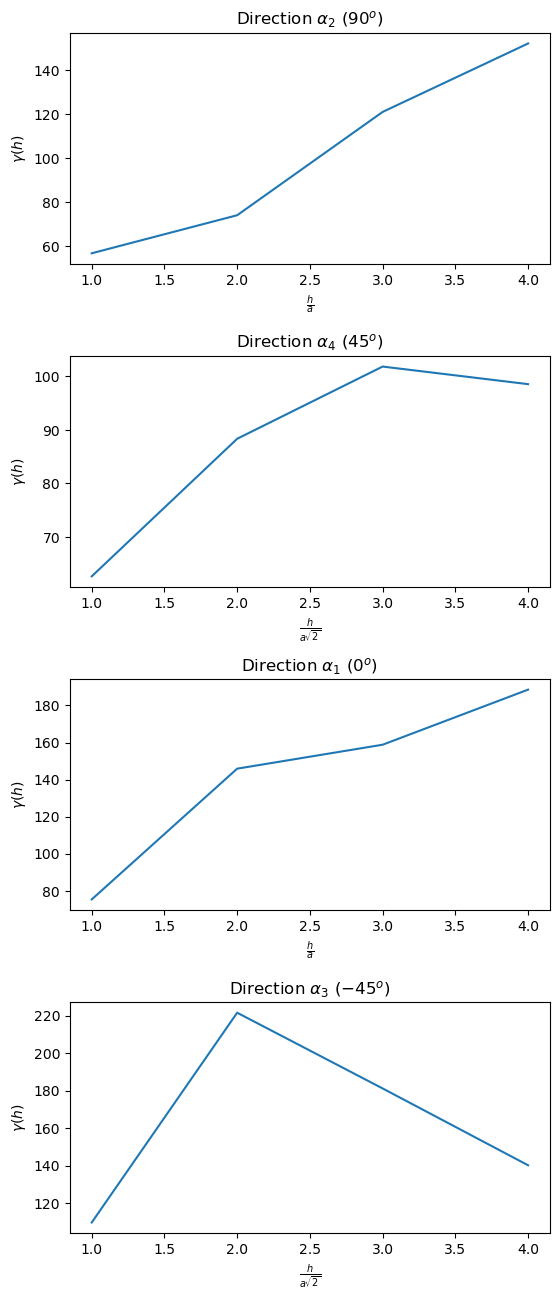

In [15]:
def plotPairs(A):
    fig, ax = plt.subplots(4,1)
    ax[0].plot(list(range(1,4+1)), semivariance(A,90,1))
    ax[0].set_title(r"Direction $\alpha_2$ ($90^o$)")
    ax[0].set_xlabel(r"$\frac{h}{a}$")
    ax[0].set_ylabel(r"$\gamma(h)$")
    
    ax[1].plot(list(range(1,4+1)), semivariance(A,45,np.sqrt(2)))
    ax[1].set_title(r"Direction $\alpha_4$ ($45^o$)")
    ax[1].set_xlabel(r"$\frac{h}{a\sqrt{2}}$")
    ax[1].set_ylabel(r"$\gamma(h)$")
    
    ax[2].plot(list(range(1,4+1)), semivariance(A,0,1))
    ax[2].set_title(r"Direction $\alpha_1$ ($0^o$)")
    ax[2].set_xlabel(r"$\frac{h}{a}$")
    ax[2].set_ylabel(r"$\gamma(h)$")
    
    ax[3].plot(list(range(1,4+1)), semivariance(A,-45,np.sqrt(2)))
    ax[3].set_title(r"Direction $\alpha_3$ ($-45^o$)")
    ax[3].set_xlabel(r"$\frac{h}{a\sqrt{2}}$")
    ax[3].set_ylabel(r"$\gamma(h)$")
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
    plt.savefig("../figs/directional.pdf", dpi=300)
    plt.show()

plotPairs(A)

In [18]:
def getPairsOfPointsOmnidirectional(A, lag, maxLags=4):
    """
    Function to get the various pairs of points for each lag in a specific direction
    
    Arguments:
        - A: 2D numpy array
        - direction: a angle, multiple of 45 degrees
    """

    pairs = [[], [], [], []]
    for y_pos, x_pos, value in zip(A[:,0], A[:,1], A[:,2]):
        for lag_multiplier in range(1,maxLags+1):
            actual_lag = lag * lag_multiplier
            samplesInsideLag = getSamplesInsideLag(A, x_pos, y_pos, actual_lag)
            for point in samplesInsideLag:
                tail = value
                head = point[2]
                pair = [tail, head]
                pairs[lag_multiplier-1].append(pair)
        
    return pairs

getPairsOfPointsOmnidirectional(A, np.sqrt(2))

[[[46.0, 54.0],
  [46.0, 61.0],
  [46.0, 65.0],
  [54.0, 46.0],
  [54.0, 59.0],
  [54.0, 61.0],
  [54.0, 65.0],
  [54.0, 79.0],
  [59.0, 54.0],
  [59.0, 65.0],
  [59.0, 79.0],
  [59.0, 66.0],
  [78.0, 66.0],
  [78.0, 79.0],
  [78.0, 69.0],
  [73.0, 69.0],
  [73.0, 71.0],
  [61.0, 46.0],
  [61.0, 54.0],
  [61.0, 65.0],
  [61.0, 71.0],
  [65.0, 46.0],
  [65.0, 54.0],
  [65.0, 59.0],
  [65.0, 61.0],
  [65.0, 79.0],
  [65.0, 71.0],
  [65.0, 88.0],
  [79.0, 54.0],
  [79.0, 59.0],
  [79.0, 65.0],
  [79.0, 66.0],
  [79.0, 88.0],
  [79.0, 74.0],
  [66.0, 59.0],
  [66.0, 78.0],
  [66.0, 79.0],
  [66.0, 79.0],
  [66.0, 88.0],
  [66.0, 74.0],
  [66.0, 73.0],
  [79.0, 78.0],
  [79.0, 66.0],
  [79.0, 69.0],
  [79.0, 74.0],
  [79.0, 73.0],
  [79.0, 60.0],
  [69.0, 78.0],
  [69.0, 73.0],
  [69.0, 79.0],
  [69.0, 71.0],
  [69.0, 73.0],
  [69.0, 60.0],
  [69.0, 49.0],
  [71.0, 73.0],
  [71.0, 69.0],
  [71.0, 60.0],
  [71.0, 49.0],
  [71.0, 61.0],
  [71.0, 65.0],
  [71.0, 78.0],
  [71.0, 86.0],
  [88.0,

In [20]:
def semivarianceOmnidirectional(A, lag, maxLags=4):
    pairs = getPairsOfPointsOmnidirectional(A, lag, maxLags=maxLags)
    
    result = np.zeros(len(pairs))
    for lag_multiplier in range(maxLags):
        for tail, head in pairs[lag_multiplier]:
            result[lag_multiplier] += (head - tail)**2
        result[lag_multiplier] /= 2*len(pairs[lag_multiplier])
        
    return result

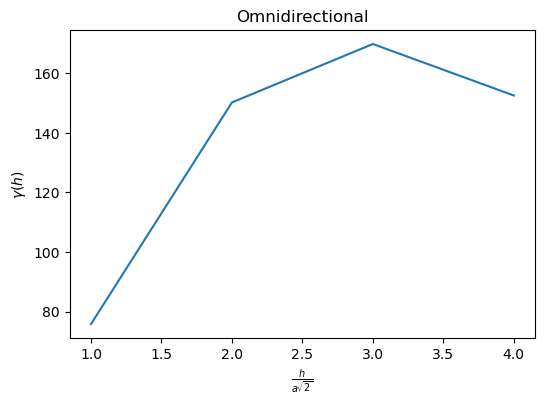

In [23]:
def plotPairs(A):
    fig, ax = plt.subplots()
    
    ax.plot(list(range(1,4+1)), semivarianceOmnidirectional(A,np.sqrt(2)))
    ax.set_title(r"Omnidirectional")
    ax.set_xlabel(r"$\frac{h}{a\sqrt{2}}$")
    ax.set_ylabel(r"$\gamma(h)$")
    
    plt.rcParams["figure.figsize"] = (4,4)
    plt.savefig("../figs/omnidirectional.pdf", dpi=300)
    plt.show()

plotPairs(A)